In [18]:
import numpy as np
eval = np.load('E:/D1/diffusion/my_models/my_model_data/picture/eval2.npy')
real = np.load('E:/D1/diffusion/my_models/my_model_data/picture/data2.npy')
print(eval.shape)
print(real.shape)

(10, 64, 64)
(10, 64, 64)


In [19]:

mask = np.isnan(real).any(axis=(1, 2))

# 使用掩码过滤掉包含NaN值的图片
real_cleaned = real[~mask]

# 输出清理后的数组形状
print("清理后的数组形状:", real_cleaned.shape)


清理后的数组形状: (10, 64, 64)


In [2]:
from sklearn.metrics import mean_squared_error

# 定义一个函数来计算均方误差
def calculate_mse(scaling_factor):
    scaled_eval = eval * scaling_factor
    mse = mean_squared_error(real.flatten(), scaled_eval.flatten())
    print(f"Scaling factor: {scaling_factor}, MSE: {mse}")
    return mse

# 遍历一系列常数，找到使得eval和real最相似的常数
scaling_factors = np.linspace(-2.0, 2.0, 100)
mse_values = [calculate_mse(factor) for factor in scaling_factors]

# 找到最小的MSE对应的常数
best_scaling_factor = scaling_factors[np.argmin(mse_values)]
print(f"Best scaling factor: {best_scaling_factor}")

Scaling factor: -2.0, MSE: 119342.328125
Scaling factor: -1.9595959595959596, MSE: 114574.640625
Scaling factor: -1.9191919191919191, MSE: 109904.1484375
Scaling factor: -1.878787878787879, MSE: 105330.8515625
Scaling factor: -1.8383838383838385, MSE: 100854.71875
Scaling factor: -1.797979797979798, MSE: 96475.796875
Scaling factor: -1.7575757575757576, MSE: 92194.0234375
Scaling factor: -1.7171717171717171, MSE: 88009.4453125
Scaling factor: -1.6767676767676767, MSE: 83922.0703125
Scaling factor: -1.6363636363636362, MSE: 79931.8671875
Scaling factor: -1.595959595959596, MSE: 76038.84375
Scaling factor: -1.5555555555555556, MSE: 72243.0390625
Scaling factor: -1.5151515151515151, MSE: 68544.390625
Scaling factor: -1.4747474747474747, MSE: 64942.92578125
Scaling factor: -1.4343434343434343, MSE: 61438.66796875
Scaling factor: -1.393939393939394, MSE: 58031.57421875
Scaling factor: -1.3535353535353534, MSE: 54721.6640625
Scaling factor: -1.3131313131313131, MSE: 51508.953125
Scaling fact

In [20]:
import coders
import torch
ACC = coders.cal_acc(torch.tensor(eval), torch.Tensor(real))

tensor([0.9132, 0.9127, 0.9147, 0.9159, 0.9026, 0.9095, 0.9162, 0.9193, 0.9098,
        0.9189])


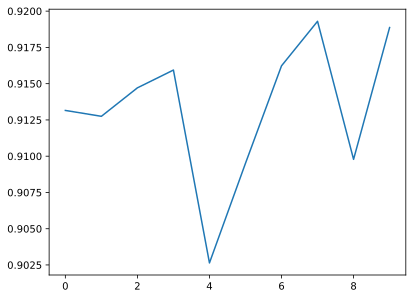

In [21]:
import matplotlib.pyplot as plt
print(ACC)
plt.plot(ACC)
plt.show()

C:\Users\fired\AppData\Local\Temp\ipykernel_9744\4199634011.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


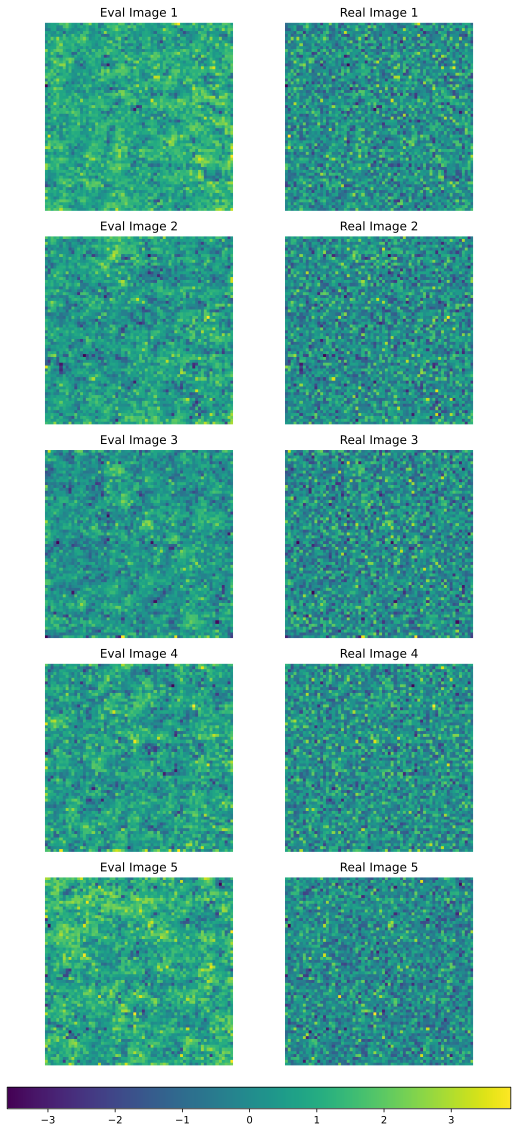

<Figure size 640x480 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt
# %matplotlib widget
%config InlineBackend.figure_format = 'svg'

show_lines = 5
fig, axs = plt.subplots(show_lines, 2, figsize=(10, 15))

# Adjust the spacing between the columns
plt.subplots_adjust(wspace=-0.5)

best_scaling_factor = 1
# Plot eval images
for i in range(show_lines):
    im = axs[i, 0].imshow(eval[i] * best_scaling_factor)
    axs[i, 0].set_title(f'Eval Image {i+1}')
    axs[i, 0].axis('off')

# Plot real images
for i in range(show_lines):
    im = axs[i, 1].imshow(real_cleaned[i])
    axs[i, 1].set_title(f'Real Image {i+1}')
    axs[i, 1].axis('off')

# Add colorbars
# Add a colorbar at the bottom of the entire figure
cbar_ax = fig.add_axes([0.15, -0.03, 0.7, 0.02])
fig.colorbar(im, cax=cbar_ax, orientation='horizontal')

plt.tight_layout()
plt.show()
plt.savefig("E:\D1\diffusion\my_models\my_model_data\picture/d.svg",format="svg")